# **Nonlinear Programming - Project I**
**Student Name**: Amirali Khatib & Amirali Bagherzade

**Studen ID**: 4032315014 & 4031315278

**Professor Name**: Dr. Majid Salari

# **Introduction**

In this Project, we introduced 4 types of nonlinear optimization algorithms and tested the them on two function instances.

The first function instance is $4(x^3) + x^2 - 7x + 14$

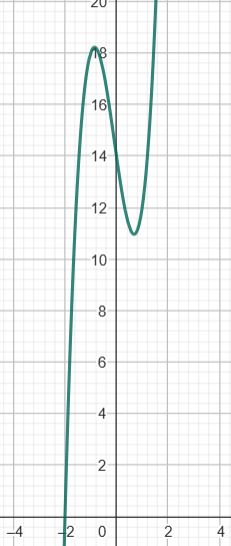

The second one is $(x - 2)^2 + e^{-x}$

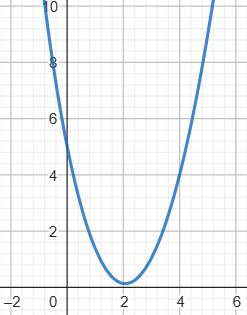

In the sections ahead, we will provide some intuition besided of code to understand the algorithm in  better way.

**Import required modules**

In [ ]:
import pandas as pd
import numpy as np
import math
import time

# **Section I (Bagherzadeh)**

## **Interval Halving Method**

The Bisection method is a simple and efficient method for finding the minimum of a unimodal function over a closed interval [𝑎,𝑏]. It works by evaluating the function at two symmetric points around the midpoint of the interval and discarding the less promising half. In each iteration, the length of the interval is reduced.

**The goal is to minimize 𝑓(𝑥) with a desired accuracy 𝜀.**

1. **Start with an initial interval [𝑎,𝑏].**

2. **Iterations:**

    * a. Compute the midpoint:
    $$
    x_0 = \frac{a + b}{2}
    $$
    * b. Choose a small constant 𝛿, and compute two symmetric points:
    $$
    x_1 = \frac{x_0 + a}{2},\quad x_2 = \frac{x_0 + b}{2}
    $$
    * c. Evaluate the function:
    $$
    f_0 = f(x_0),\quad f_1 = f(x_1),\quad f_2 = f(x_2)
    $$
    * d. Update the interval:

        1. if $min(𝑓(0), 𝑓(1), 𝑓(2))= 𝑓(0)$ then:
        $$
        a = x_1 ,\quad b = x_2, \quad x_0 = x_0
        $$
        2. if $min(𝑓(0), 𝑓(1), 𝑓(2))= 𝑓(1)$ then:
        $$
        a = a ,\quad b = x_0, \quad x_0 = x_1
        $$
        3. if $min(𝑓(0), 𝑓(1), 𝑓(2))= 𝑓(2)$ then:
        $$
        a = x_0 ,\quad b = b, \quad x_0 = x_2
        $$


3. **Repeat *step 2* until the stopping condition ∣𝑏 − 𝑎∣ < 𝜀 is met.**


4. **approximate minimum is taken as the midpoint:**
$$
x^* = \frac{a + b}{2}
$$


In [ ]:
def Interval_Halving(f, a, b, epsilon):
    # Step 1: Initialize
    x0 = (a + b) / 2
    f0 = f(x0)

    steps_log = []  # List to store log of each iteration


    step = 1
    while abs(b - a) > epsilon:
        # Step 2.1: Compute symmetric points
        x1 = (a + x0) / 2
        x2 = (x0 + b) / 2

        # Step 2.2: Evaluate function
        f1 = f(x1)
        f2 = f(x2)

        # Save current step data
        steps_log.append({
            'Step': step,
            'x0': round(x0, 6), 'f(x0)': round(f0, 6),
            'x1': round(x1, 6), 'f(x1)': round(f1, 6),
            'x2': round(x2, 6), 'f(x2)': round(f2, 6)
        })

        # Step 2.3: Update the interval
        if f0 <= f1 and f0 <= f2:
            a = x1
            b = x2
        # x0 stays the same
        elif f1 < f0 and f1 <= f2:
            b = x0
            x0 = x1
            f0 = f1
        else:
            a = x0
            x0 = x2
            f0 = f2

        step += 1

    # Create DataFrame
    df = pd.DataFrame(steps_log)


    # Step 4: Return the approximate minimum
    return (a + b) / 2, df

In [ ]:
def instance_1(x):
    return 4 * (x ** 3) + x ** 2 - 7 * x + 14
def instance_2(x):
    return (x - 2)**2 + np.exp(-x)

In [ ]:
start_time = time.time()
# Perform Interval Halving Method
xmin , df = Interval_Halving(instance_1, 0, 4, epsilon=0.1)
# Calculate Run time
end_time = time.time()
run_time = end_time - start_time

print("Result of Interval Halving Method:")
print(f"Minimum is approximately at x = {xmin}")
print("f(x) =", instance_1(xmin))
print(f"Run time: {run_time}")
print('Steps of Algorithm:')
print(df)

Result of Interval Halving Method:
Minimum is approximately at x = 0.6875
f(x) = 10.9599609375
Run time: 0.0
Steps of Algorithm:
   Step      x0      f(x0)       x1      f(x1)       x2       f(x2)
0     1  2.0000  36.000000  1.00000  12.000000  3.00000  110.000000
1     2  1.0000  12.000000  0.50000  11.250000  1.50000   19.250000
2     3  0.5000  11.250000  0.25000  12.375000  0.75000   11.000000
3     4  0.7500  11.000000  0.62500  10.992188  0.87500   11.320312
4     5  0.6250  10.992188  0.56250  11.090820  0.68750   10.959961
5     6  0.6875  10.959961  0.65625  10.967407  0.71875   10.970581


## **Fibonacci Method**

The Fibonacci search is a method used for unimodal function optimization over a bounded interval  [𝑎,𝑏]. It is particularly effective when derivative information is unavailable. The method reduces the search interval at each step using ratios derived from the Fibonacci sequence.

**The goal is to find the minimum of 𝑓(𝑥) with a desired precision 𝜀.**


The Fibonacci sequence is defined as:

$$
F_0 = 1,\quad F_1 = 1,\quad F_n = F_{n-1} + F_{n-2},\quad n \geq 2
$$


The sequence is used to determine the ratio of interval division in each iteration, and the total number of iterations required to achieve the desired precision.

To ensure the final interval length is less than 𝜀, we choose the smallest 𝑁 such that:

$$
F_N \geq \frac{b - a}{\varepsilon}
$$

**1. Initialization**

  After computing 𝑁, set  *K*=1 and compute initial test points:
  $$
  \mu = a + \frac{F_{N-2}}{F_N} (b - a)
  $$
  $$
  \lambda = a + \frac{F_{N-1}}{F_N} (b - a)
  $$


**2. Iterations**

  At each iteration 𝑘, based on the function evaluations 𝑓(𝜇) and 𝑓(𝜆), update the interval:

  * If 𝑓(𝜇) > 𝑓(𝜆), then the new interval becomes [𝜇,𝑏]
  * Else, update to [𝑎,𝜆]

  Update the test points using:
  $$
  \lambda_{k} = a_{k} + \frac{F_{N-k-1}}{F_{N-k+1}} (b_{k} - a_{k})
  $$
  $$
  \mu_{k} = a_{k} + \frac{F_{N-k}}{F_{N-k+1}} (b_{k} - a_{k})
  $$

**3. Stopping Criterion**

  Repeat step 2 until 𝑘 = 𝑁.

**4. Approximate Point**

  approximate minimum is taken as the midpoint:
  $$
  x^* = \frac{\mu_{N} + \lambda_{N}}{2}
  $$

In [ ]:
# Generate Fibonacci sequence until a number greater than (b - a) / epsilon
def fibonacci_sequence(n):
    F = [1, 1]
    while F[-1] <= n:
        F.append(F[-1] + F[-2])
    return F

def Fibonacci_Search(f, a, b, epsilon):
    # Determine the required number of iterations based on precision
    n = (b - a) / epsilon
    F = fibonacci_sequence(n)
    N = len(F) - 1  # Last valid index is N

    # Initialize logging list
    steps_log = []

    # Step 1: Initialize first two points
    k = 1
    lambda_ = a + (F[N - k - 1] / F[N - k + 1]) * (b - a)
    mu = a + (F[N - k] / F[N - k + 1]) * (b - a)
    f1 = f(lambda_)
    f2 = f(mu)

    # Save first step
    steps_log.append({
        'Step': k,
        'a': round(a, 6),
        'b': round(b, 6),
        'lambda': round(lambda_, 6),
        'f(lambda)': round(f1, 6),
        'mu': round(mu, 6),
        'f(mu)': round(f2, 6)
    })

    # Step 2: Iteratively narrow the search interval
    while (k < N):

        if f1 > f2:
            a = lambda_
            lambda_ = mu
            f1 = f2
            mu = a + (F[N - k] / F[N - k + 1]) * (b - a)
            f2 = f(mu)
        else:
            b = mu
            mu = lambda_
            f2 = f1
            lambda_ = a + (F[N - k - 1] / F[N - k + 1]) * (b - a)
            f1 = f(lambda_)

        # Step 3: Repeat Iterations
        k += 1

        # Save current step
        steps_log.append({
            'Step': k,
            'a': round(a, 6),
            'b': round(b, 6),
            'lambda': round(lambda_, 9),
            'f(lambda)': round(f1, 9),
            'mu': round(mu, 9),
            'f(mu)': round(f2, 9)
        })

    # Create and print DataFrame
    df = pd.DataFrame(steps_log)

    # Step 4: Return the midpoint of the final interval as the approximate minimum
    return (lambda_ + mu) / 2, df


In [ ]:
start_time = time.time()
# Perform Fibonacci Search
xmin , df = Fibonacci_Search(instance_1, 0, 4, epsilon=0.1)
# Calculate Run time
end_time = time.time()
run_time = end_time - start_time

print("Result of Fibonacci Search:")
print(f"Minimum is approximately at x = {xmin}")
print("f(x) =", instance_1(xmin))
print(f"Run time: {run_time}")
print('Steps of Algorithm:')
print(df)

Result of Fibonacci Search:
Minimum is approximately at x = 0.6741063036784962
f(x) = 10.960982864830864
Run time: 0.0
Steps of Algorithm:
   Step         a         b    lambda  f(lambda)        mu      f(mu)
0     1  0.000000  4.000000  1.527273  19.891486  2.472727  63.282068
1     2  0.000000  2.472727  0.944132  11.648804  1.527273  19.891486
2     3  0.000000  1.527273  0.583957  11.049837  0.944132  11.648804
3     4  0.000000  0.944132  0.359669  11.797786  0.583957  11.049837
4     5  0.359669  0.944132  0.583957  11.049837  0.719339  10.970959
5     6  0.583957  0.944132  0.719339  10.970959  0.809067  11.109546
6     7  0.583957  0.809067  0.674001  10.961004  0.719339  10.970959
7     8  0.583957  0.719339  0.629084  10.987990  0.674001  10.961004
8     9  0.629084  0.719339  0.674001  10.961004  0.674212  10.960962


## **Results I**

In [ ]:
def instance_1(x):
    return 4 * (x ** 3) + x ** 2 - 7 * x + 14
def instance_2(x):
    return (x - 2)**2 + math.exp(-1 * x)

In [ ]:
instance_list = [instance_1 , instance_2]
epsilon_list = [0.1, 0.01]
uncertainty_interval_list = [[0,2], [0,6]]

In [ ]:
method_list = [Interval_Halving, Fibonacci_Search]

result_dict = {
    'Instance': [],
    'Method': [],
    'Problem':[],
    'Epsilon': [],
    'Interval': [],
    'No.Exp':[],
    'x*': [],
    'fitness': []
}

for inst, epsilon, interval in zip(instance_list, epsilon_list, uncertainty_interval_list):
    for method in method_list:
        x_star, df = method(inst, interval[0], interval[1], epsilon)

        if inst.__name__ == "instance_1":
            result_dict['Instance'].append(1)
        else:
            result_dict['Instance'].append(2)

        if method.__name__ == "Interval_Halving":
            result_dict['Method'].append('Interval Halving Search')
        else:
            result_dict['Method'].append('Fibonacci Search')

        result_dict['Problem'].append('min')
        result_dict['Epsilon'].append(epsilon)
        result_dict['Interval'].append(interval)
        result_dict['x*'].append(x_star)
        result_dict['fitness'].append(inst(x_star))
        if method.__name__ == 'Interval_Halving':
            result_dict['No.Exp'].append((2 * len(df)) + 1)
        else:
            result_dict['No.Exp'].append(len(df) + 1)


result_dict = pd.DataFrame(result_dict)

In [ ]:
result_dict

,Instance,Method,Problem,Epsilon,Interval,No.Exp,x*,fitness
0,1,Interval Halving Search,min,0.10,"[0, 2]",11,0.687500,10.959961
1,1,Fibonacci Search,min,0.10,"[0, 2]",8,0.704535,10.963464
2,2,Interval Halving Search,min,0.01,"[0, 6]",21,2.062500,0.131042
3,2,Fibonacci Search,min,0.01,"[0, 6]",15,2.060792,0.131049


# **Section II (Khatib)**

## **Ditchotomous search**

Ditchotomous search is a simpler version in comparison to Golden section algorithm. It works iteratively in a way that to split the interval of uncertainty into approximately half in each step. Here are the detailed steps of this technique (For Minimization problem):

1. Define a value of $δ$ and $ϵ$ (**Note**: $δ$ must be lower than $ϵ$ for convergence condition)

2. Repeat the following steps until the lenght of the interval of uncertainty is lower than $\epsilon$.

3. Calculate the middle of interval of uncertainty. $x_{c} = \frac{a + b}{2}$ and find two points $x' = x_{c}-\frac {δ}{2}$ and $x'' = x_{c}+\frac {δ}{2}$ in its both sides.

4. Make a comparison between $f(x')$ and $f(x'')$. if $f(x') > f(x'')$ then eliminate $[x'',b]$ from $[a, b]$. The remaining interval is $[a, x'']$. else if $f(x') < f(x'')$ then eliminate $[a, x']$ from $[a, b]$. The remaining interval is $[x', b]$.

5. Update the interval by the remaining interval and go to step 3.

6. Calculate the solution $x^{*} = \frac {a+b}{2}$ and $f(x^{*})$





### **Code Explanation**

* **`f(self, x)`**: Objective function
* **`update_f_range(self, no_step)`**: The method is developed to calculate the center of the last updated interval and its both neighbors with the distance of $\frac{\delta}{2}$. Next it perform a comparison between these two neighbors to draw a conclusion about which half of the interval to eliminate.
* **`run(self)`**: Iteratively, it implements the `update_f_range(self, no_step)` to converge and find the final solution.

In [ ]:
class Ditchotomous_search:
  def __init__(self, f_range, delta, epsilon, kind, instance):
    self.kind = kind
    self.f_range = f_range
    self.length = f_range[1] - f_range[0]
    self.delta = delta
    self.hist_dict = {}
    self.instance = instance
    self.epsilon = epsilon
    pass

  def f(self, x):
    if self.instance == 1:
      return 4 * (x ** 3) + x ** 2 - 7 * x + 14
    elif self.instance == 2:
      return (x - 2)**2 + np.exp(-x)

  def update_f_range(self, no_step):

    center = (self.f_range[0] + self.f_range[1]) / 2
    x, y = center - self.delta/2, center + self.delta/2

    current_step = {f'step {no_step}': [self.f_range[0], x, center,  y, self.f_range[1]]}
    self.hist_dict.update(current_step)

    if self.kind == 'min':
      if self.f(x) < self.f(y):
        self.f_range[1] = y
      else:
        self.f_range[0] = x

    elif self.kind == 'max':
      if self.f(x) < self.f(y):
        self.f_range[0] = x
      else:
        self.f_range[1] = y

    return None

  def run(self):

    i = 1
    while np.abs(self.f_range[0] - self.f_range[1]) > self.epsilon:
      self.update_f_range(i)
      i += 1

    x_mid = (self.f_range[0] + self.f_range[1]) / 2
    # print(f'Final Solution: {self.f(x_mid)}')

    data_frame = pd.DataFrame(self.hist_dict, index = ['a', 'c-delta/2', 'c', 'c+delta/2', 'b']).T

    return data_frame, x_mid, self.f(x_mid), 2 * len(data_frame)

In [ ]:
ditchotomous_solver = Ditchotomous_search([0,1], 0.009, 0.01, 'min', 1)
_ , x_star, f_star, no_exp = ditchotomous_solver.run()
print(f"x*: {x_star}, fitness: {f_star}")
_

x*: 0.6853286132812499, fitness: 10.95990272580851


,a,c-delta/2,c,c+delta/2,b
step 1,0.000000,0.495500,0.500000,0.504500,1.000000
step 2,0.495500,0.743250,0.747750,0.752250,1.000000
step 3,0.495500,0.619375,0.623875,0.628375,0.752250
step 4,0.619375,0.681312,0.685812,0.690312,0.752250
step 5,0.619375,0.650344,0.654844,0.659344,0.690312
step 6,0.650344,0.665828,0.670328,0.674828,0.690312
step 7,0.665828,0.673570,0.678070,0.682570,0.690312
step 8,0.673570,0.677441,0.681941,0.686441,0.690312
step 9,0.677441,0.679377,0.683877,0.688377,0.690312
step 10,0.679377,0.680345,0.684845,0.689345,0.690312


## **Golden Section Search**

The **Golden Section Search Method** is an optimization technique used to find the minimum (or maximum) of a unimodal function in a specified interval. It is particularly effective for functions that are continuous and unimodal, meaning they have a single peak or trough within the interval. This method is often applied in nonlinear programming when derivatives are not readily available.
Before going through detailed steps, we should define the function's interval $[a,b]$. Its length is also defined as $L_0 = b - a$. The Golden ratio $\gamma$ equals to 1.618.

Here is the thorough explanation of the Golden Section algorithm's steps (For Minimization problem):

1. Add 2 points to the function's interval
      
      $x_{1} = a + (\frac{b-a}{\gamma^{2}})$

      $x_{2} = b - (\frac{b-a}{\gamma^{2}})$

2. Make a comparison between $f(x_{1})$ and $f(x_{2})$. if one of them is greater, eliminate their side from the interval and update the values of $a$ and $b$. ($[a, x_{1}]$ (if $f(x_{1}) > f(x_{2})$) or $[x_{2}, b]$ (if $f(x_{1}) < f(x_{2})$) is eliminated in this step)

3. $i = 1$

4. Repeat the following steps until the length of the remaining interval is lower than $ϵ$.
  
5. add 1 point to the interval. this point falls over the opposite side of the eliminated one. (number of added points in this step = $2 + i$ ; $i$ = 1,2,3,...)

      $x_{2+i} = a + (\frac{b-a}{\gamma^{2+i}})$

      or
    
      $x_{2+i} = b - (\frac{b-a}{\gamma^{2+i}})$

6. Make the comparison like what we did in step 2.

7. Go to step 5 and $i = i+1$

8. Calculate the solution $x' = \frac{a+b}{2}$ and $f(x')$.

### **Code Explanation**

* **`f(self, x)`**: Objective function
* **`initial_breakdown(self)`**: what this function does, is to split the interval of uncertainty into three part for the first time.
* **`is_right(self)`**: It determines which side of the interval to eliminate during each iteration of the Golden Section Search algorithm. In each step, you evaluate the function at two interior points and eliminate part of the interval based on which side appears worse (higher for min problems, lower for max problems).
* **`general_breakdown(no_step)`**: This method performs one iteration of narrowing down the search interval based on the result of `self.is_right()`.

  1. Computes a new point inside the interval.

  2. Discards part of the current interval based on which side appears worse.

  3. Updates `self.f_range` to reflect the new interval.

* **`run(self)`**: This method does the following tasks:
  1. Initializes the search interval.

  2. Repeatedly narrows it using general_breakdown() until it's smaller than a given tolerance epsilon.

  3. Calculates the approximate solution.

In [ ]:
class Golden_section:
  def __init__(self, f_range, epsilon, kind, instance):
    self.kind = kind
    self.f_range = f_range
    self.length = f_range[1] - f_range[0]
    self.gamma = 1.618
    self.epsilon = epsilon
    self.instance = instance
    self.hist_dict = {}

  def f(self, x):
    if self.instance == 1:
      return 4 * (x ** 3) + x ** 2 - 7 * x + 14
    elif self.instance == 2:
      return (x - 2)**2 + np.exp(-x)

  def initial_breakdown(self):

    # computing l2_star
    l2_star = (1/(self.gamma**2))*(self.f_range[1] - self.f_range[0])

    # computing middle points in the current range
    x1 = self.f_range[0] + l2_star
    x2 = self.f_range[1] - l2_star

    # update the f_range
    self.f_range.insert(1, x1)
    self.f_range.insert(2, x2)

    # adding to dict hist
    current_step = {'step 1': self.f_range.copy()}
    self.hist_dict.update(current_step)

    return None


  def is_right(self):

    # choose the side to eliminate for minimization problem
    if self.kind == 'min':
      if self.f(self.f_range[1]) < self.f(self.f_range[2]):
        return True
      else:
        return False

    # choose the side to eliminate for maximization problem
    elif self.kind == 'max':
      if self.f(self.f_range[1]) > self.f(self.f_range[2]):
        return True
      else:
        return False

  def general_breakdown(self, no_step):
    # compute current l_star
    current_lstar = (1 / (self.gamma)**(no_step+1)) * self.length

    if self.is_right():
      self.f_range.pop(3)
      # compute newly point
      new_point = self.f_range[0] + current_lstar
      # add new point to f_range list
      self.f_range.insert(1, new_point)

    else:
      self.f_range.pop(0)
      # compute newly point
      new_point = self.f_range[2] - current_lstar
      # add new point to f_range list
      self.f_range.insert(2, new_point)

    # add to dict
    current_step = {'step ' + str(no_step): self.f_range.copy()}
    self.hist_dict.update(current_step)

    return None

  def run(self):
    self.initial_breakdown()

    i = 2
    while np.abs(self.f_range[0] - self.f_range[-1]) > self.epsilon:
      # print('hi')
      self.general_breakdown(i)
      i += 1

    x_mid = (self.f_range[0] + self.f_range[-1]) / 2

    # print(f'Final Solution: x = {x_mid}  f(x) = {self.f(x_mid)}')

    data_frame = pd.DataFrame(self.hist_dict, index = ['a', "x", "y", 'b']).T

    return data_frame, x_mid, self.f(x_mid), len(data_frame)+1

In [ ]:
gs_solver = Golden_section([0,2], 0.1, 'min',1)

In [ ]:
_ , x_star, f_star, no_exp = gs_solver.run()

In [ ]:
print(f"x*: {x_star}, fitness: {f_star}")
_

x*: 0.6869545151193857, fitness: 10.95993811961921


,a,x,y,b
step 1,0.000000,0.763964,1.236036,2.000000
step 2,0.000000,0.472166,0.763964,1.236036
step 3,0.472166,0.763964,0.944215,1.236036
step 4,0.472166,0.652525,0.763964,0.944215
step 5,0.472166,0.583636,0.652525,0.763964
step 6,0.583636,0.652525,0.695070,0.763964
step 7,0.652525,0.695070,0.721384,0.763964
step 8,0.652525,0.678841,0.695070,0.721384


## **Results II**

In [ ]:
epsilon_list = [0.1, 0.01]
uncertainty_interval_list = [[0,2], [0,6]]
instance_list = [1 , 2]

In [ ]:
report_dict = {
    'Instance':[],
    'Method':[],
    'Problem':[],
    'Epsilon':[],
    'Interval':[],
    'No.Exp':[],
    'x*':[],
    'fitness':[]
}

for inst, eps, intrvl in list(zip(instance_list, epsilon_list, uncertainty_interval_list)):
    for m in ['Golden Section Search', 'Ditchotomous Search']:

      if m == 'Golden Section Search':
        current_solver = Golden_section(f_range = intrvl.copy(), epsilon = eps, kind = 'min', instance = inst)
        _ , x_star, f_star, no_exp = current_solver.run()

        report_dict['Instance'].append(inst)
        report_dict['Method'].append(m)
        report_dict['x*'].append(x_star)
        report_dict['fitness'].append(f_star)
        report_dict['Interval'].append(intrvl)
        report_dict['Epsilon'].append(eps)
        report_dict['Problem'].append('min')
        report_dict['No.Exp'].append(no_exp)
        pass

      else:
        current_solver = Ditchotomous_search(f_range = intrvl.copy(), delta = 0.005, epsilon = eps , kind = 'min', instance = inst)
        _ , x_star, f_star, no_exp = current_solver.run()

        report_dict['Instance'].append(inst)
        report_dict['Method'].append(m)
        report_dict['x*'].append(x_star)
        report_dict['fitness'].append(f_star)
        report_dict['Interval'].append(intrvl)
        report_dict['Epsilon'].append(eps)
        report_dict['Problem'].append('min')
        report_dict['No.Exp'].append(no_exp)
        pass

report_dict = pd.DataFrame(report_dict)

In [ ]:
report_dict

,Instance,Method,Problem,Epsilon,Interval,No.Exp,x*,fitness
0,1,Golden Section Search,min,0.10,"[0, 2]",9,0.686955,10.959938
1,1,Ditchotomous Search,min,0.10,"[0, 2]",10,0.657109,10.966967
2,2,Golden Section Search,min,0.01,"[0, 6]",16,2.063120,0.131041
3,2,Ditchotomous Search,min,0.01,"[0, 6]",22,2.064745,0.131043


# **Final results**

As a conclusion, we tested the algorithm on certain parameter adjustments. And the results are all gathered in the Table above

In [ ]:
from tabulate import tabulate

merged_df = pd.concat([result_dict, report_dict], ignore_index=True)
method_order = ['Ditchotomous Search', 'Interval Halving Search', 'Fibonacci Search', 'Golden Section Search']
merged_df['Method'] = pd.Categorical(merged_df['Method'], categories=method_order, ordered=True)
merged_df = merged_df.sort_values(by=['Instance', 'Method']).reset_index(drop=True)

print(tabulate(merged_df, headers='keys', tablefmt="pretty"))

+---+----------+-------------------------+---------+---------+----------+--------+--------------------+---------------------+
|   | Instance |         Method          | Problem | Epsilon | Interval | No.Exp |         x*         |       fitness       |
+---+----------+-------------------------+---------+---------+----------+--------+--------------------+---------------------+
| 0 |    1     |   Ditchotomous Search   |   min   |   0.1   |  [0, 2]  |   10   | 0.6571093749999999 | 10.966967311346053  |
| 1 |    1     | Interval Halving Search |   min   |   0.1   |  [0, 2]  |   11   |       0.6875       |    10.9599609375    |
| 2 |    1     |    Fibonacci Search     |   min   |   0.1   |  [0, 2]  |   8    | 0.7045351473922903 | 10.963463549459115  |
| 3 |    1     |  Golden Section Search  |   min   |   0.1   |  [0, 2]  |   9    | 0.6869545151193857 |  10.95993811961921  |
| 4 |    2     |   Ditchotomous Search   |   min   |  0.01   |  [0, 6]  |   22   | 2.064744873046875  | 0.131042548045